In [76]:
# Python NumPy & PNQY library & ability to plot
import numpy as np 
from pynq import allocate, Overlay, MMIO
import matplotlib.pyplot as plt 
import time

In [19]:
# Download bistream & parse HWH for IPI block diagram
ol = Overlay("design_1.bit") # hwh is parsed here

# Interrogate HWH & display information about design
print(f"IP blocks: {ol.ip_dict.keys()}")
print(f"\nram_re: {ol.ip_dict['ram_re_0']}")

IP blocks: dict_keys(['axi_dma', 'ram_re_0', 'zynq_ultra_ps_e_0'])

ram_re: {'type': 'CoRSoC:VMC:ram_re:1.0', 'mem_id': 'ram_re_ip_s_axi', 'memtype': 'REGISTER', 'gpio': {}, 'interrupts': {}, 'parameters': {'Component_Name': 'design_1_ram_re_0_0', 'EDK_IPTYPE': 'PERIPHERAL', 'C_RAM_RE_IP_S_AXI_BASEADDR': '0xA0010000', 'C_RAM_RE_IP_S_AXI_HIGHADDR': '0xA001FFFF', 'CLK_DOMAIN': 'design_1_zynq_ultra_ps_e_0_0_pl_clk0', 'FREQ_HZ': '96968727', 'HAS_TKEEP': '0', 'HAS_TLAST': '1', 'HAS_TREADY': '0', 'HAS_TSTRB': '0', 'INSERT_VIP': '0', 'LAYERED_METADATA': 'xilinx.com:interface:datatypes:1.0 {TDATA {datatype {name {attribs {resolve_type immediate dependency {} format string minimum {} maximum {}} value {}} bitwidth {attribs {resolve_type immediate dependency {} format long minimum {} maximum {}} value 16} bitoffset {attribs {resolve_type immediate dependency {} format long minimum {} maximum {}} value 0} real {fixed {fractwidth {attribs {resolve_type immediate dependency {} format long minimum {

In [49]:
# Get name of ram_re
ram_re = ol.ip_dict['ram_re_0']['fullpath']
print(f"\nram_re name: {ram_re}")      

# Get base address of ram_re
print(f"\nram_re address: {int(hex(ol.ip_dict['ram_re_0']['phys_addr']),16)}")
print(f"ram_re address hex: {hex(ol.ip_dict['ram_re_0']['phys_addr'])}")
ram_re_addr = 0xa0010000

# Get address range of ram_re
print(f"\nram_re address range: {int(hex(ol.ip_dict['ram_re_0']['addr_range']),16)}")
print(f"ram_re address range hex: {hex(ol.ip_dict['ram_re_0']['addr_range'])}")
ram_re_addr_range = 0x10000

# Create MMIO object to interact with AXI Lite interface of ram_re
ram_re_mmio = MMIO(ram_re_addr, ram_re_addr_range)
print(f"\nram_re_mmio: {ram_re_mmio}")


ram_re name: ram_re_0

ram_re address: 2684420096
ram_re address hex: 0xa0010000

ram_re address range: 65536
ram_re address range hex: 0x10000

ram_re_mmio: <pynq.mmio.MMIO object at 0xffff63e6f2b0>


In [70]:
# Write data to the control register 
#input_data = allocate(shape=(1,), dtype=np.uint32) 
#input_data[0] = 1
input_data = 1
address_offset = 0x0 # Must be multiple of 4
ram_re_mmio.write(address_offset, input_data)
print(f"Data sent to ram_re: {ram_re_mmio.read(address_offset)}")
input_data = 1
address_offset = 0x0 # Must be multiple of 4
ram_re_mmio.write(address_offset, input_data)
print(f"Data sent to ram_re: {ram_re_mmio.read(address_offset)}")

Data sent to ram_re: 1
Data sent to ram_re: 1


In [71]:
# Get the DMA instance
dma = ol.axi_dma 

# Allocate memory for DMA transfer
output_buffer = allocate(shape=(100,), dtype=np.uint32)

# Start DMA transfer
dma.recvchannel.transfer(output_buffer)
dma.recvchannel.wait()

In [72]:
print(f"DMA output: {output_buffer}")
result = output_buffer.astype(np.int32)
print(f"\ndma_re data: {result}")

DMA output: [2028109823 1150706768 2926088836 4250063714 1298409358      27294
          0          0          0          0          0          0
          0          0          0          0          0          0
          0          0          0          0          0          0
          0          0          0          0          0          0
          0          0          0          0          0          0
          0          0          0          0          0          0
          0          0          0          0          0          0
          0          0          0          0          0          0
          0          0          0          0          0          0
          0          0          0          0          0          0
          0          0          0          0          0          0
          0          0          0          0          0          0
          0          0          0          0          0          0
          0          0          0          0      

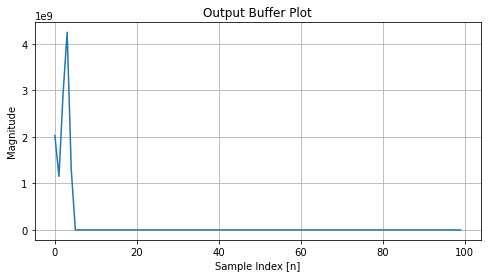

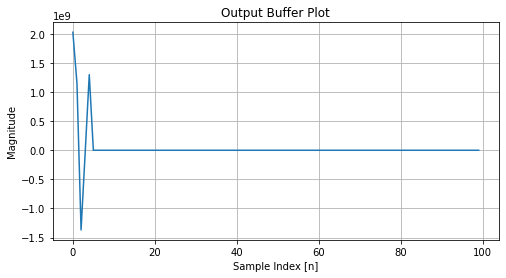

In [73]:
# Plot data
plt.figure(figsize=(8, 4))
plt.plot(output_buffer, label="dsp_RAM")
plt.xlabel("Sample Index [n]")
plt.ylabel("Magnitude")
plt.title("Output Buffer Plot")
plt.grid(True)
plt.show()

# Plot data
plt.figure(figsize=(8, 4))
plt.plot(result, label="dsp_RAM")
plt.xlabel("Sample Index [n]")
plt.ylabel("Magnitude")
plt.title("Output Buffer Plot")
plt.grid(True)
plt.show()

Iteration: 0
	Data sent to ram_re: 1
	Data sent to ram_re: 1
	Waited for 2s
	Waited for 5s
	Iteration time: 10.014353275299072
	Elapsed time: 10.01591444015503
Iteration: 1
	Data sent to ram_re: 1
	Data sent to ram_re: 1
	Waited for 2s
	Waited for 5s
	Iteration time: 10.010643243789673
	Elapsed time: 20.026662826538086
Iteration: 2
	Data sent to ram_re: 1
	Data sent to ram_re: 1
	Waited for 2s
	Waited for 5s
	Iteration time: 10.014133214950562
	Elapsed time: 30.04090189933777
Iteration: 3
	Data sent to ram_re: 1
	Data sent to ram_re: 1
	Waited for 2s
	Waited for 5s
	Iteration time: 10.014067888259888
	Elapsed time: 40.05507564544678
Iteration: 4
	Data sent to ram_re: 1
	Data sent to ram_re: 1
	Waited for 2s
	Waited for 5s
	Iteration time: 10.014085054397583
	Elapsed time: 50.06926417350769
Iteration: 5
	Data sent to ram_re: 1
	Data sent to ram_re: 1
	Waited for 2s
	Waited for 5s
	Iteration time: 10.014034032821655
	Elapsed time: 60.083401918411255
Iteration: 6
	Data sent to ram_re: 1
	

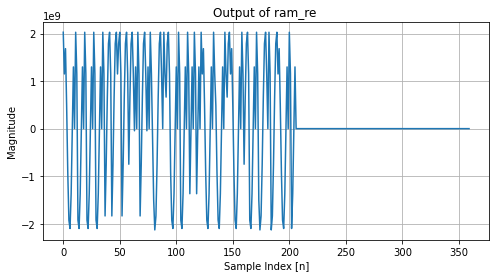

In [109]:
arr = [0]*12*30
idx = 0
t1 = time.time()
for i in range(30):
    t2 = time.time()
    print(f"Iteration: {i}")
    # Write data to the control register 
    input_data = 1
    address_offset = 0x0 # Must be multiple of 4
    ram_re_mmio.write(address_offset, input_data)
    print(f"\tData sent to ram_re: {ram_re_mmio.read(address_offset)}")
    input_data = 1
    address_offset = 0x0 # Must be multiple of 4
    ram_re_mmio.write(address_offset, input_data)
    print(f"\tData sent to ram_re: {ram_re_mmio.read(address_offset)}")
    
    time.sleep(5)
    print("\tWaited for 2s")
    
    # Get the DMA instance
    dma = ol.axi_dma 

    # Allocate memory for DMA transfer
    output_buffer = allocate(shape=(100,), dtype=np.uint32)

    # Start DMA transfer
    dma.recvchannel.transfer(output_buffer)
    dma.recvchannel.wait()

    time.sleep(5)
    print("\tWaited for 5s")
    
    #print(f"DMA output: {output_buffer}")
    result = output_buffer.astype(np.int32)
    #print(f"\ndma_re data: {result}")

    for k in range(100):
        if result[k] != 0:
            arr[idx] = result[k]
            idx += 1
    
    t3 = time.time()
    elapsed_time = t3-t1
    print(f"\tIteration time: {t3-t2}")
    print(f"\tElapsed time: {elapsed_time}")
# Plot data
plt.figure(figsize=(8, 4))
plt.plot(arr, label="dsp_RAM")
plt.xlabel("Sample Index [n]")
plt.ylabel("Magnitude")
plt.title("Output of ram_re ")
plt.grid(True)
plt.show()

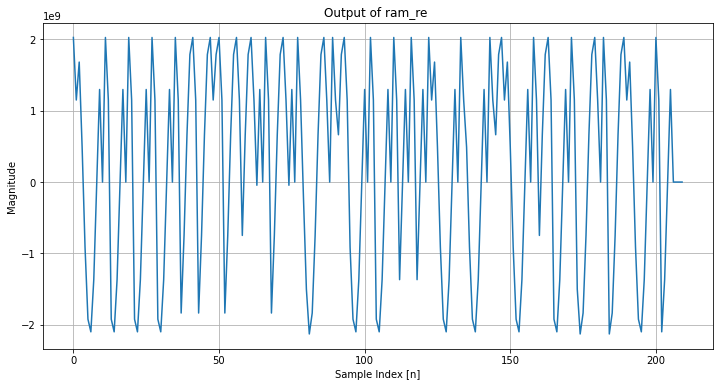

In [115]:
# Plot data
plt.figure(figsize=(12, 6))
plt.plot(arr[0:210], label="dsp_RAM")
plt.xlabel("Sample Index [n]")
plt.ylabel("Magnitude")
plt.title("Output of ram_re ")
plt.grid(True)
plt.show()

In [74]:
# Measure time taken by hw operator
%%timeit 
dma.sendchannel.transfer(input_buffer) 
dma.recvchannel.transfer(output_buffer) 
dma.sendchannel.wait() 
dma.recvchannel.wait()

UsageError: Line magic function `%%timeit` not found.
